In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image


In [32]:
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# or any of these variant
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()

Using cache found in /home/gnz/.cache/torch/hub/pytorch_vision_v0.10.0
/home/gnz/GitHub/MeatMarbleAI/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gnz/GitHub/MeatMarbleAI/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /home/gnz/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100.0%


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [33]:
# Ruta de la imagen
image_path = '../imgs/001.jpg'

# Cargar la imagen
image = Image.open(image_path)

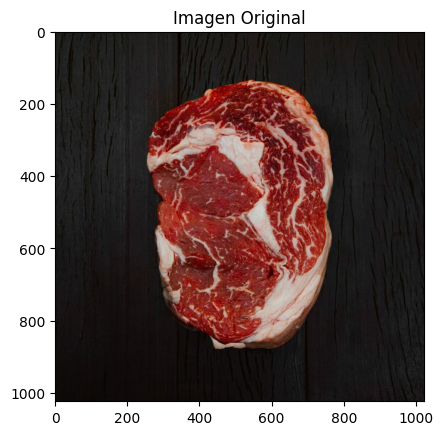

In [34]:
plt.figure()
plt.title("Imagen Original")
plt.imshow(image)
plt.show()

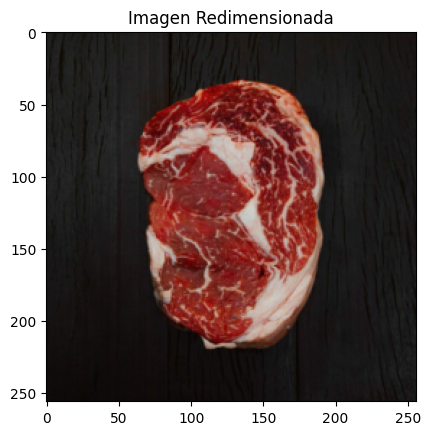

In [35]:
# Redimensionar la imagen
resize_transform = transforms.Resize(256)
image_resized = resize_transform(image)
plt.figure()
plt.title("Imagen Redimensionada")
plt.imshow(image_resized)
plt.show()


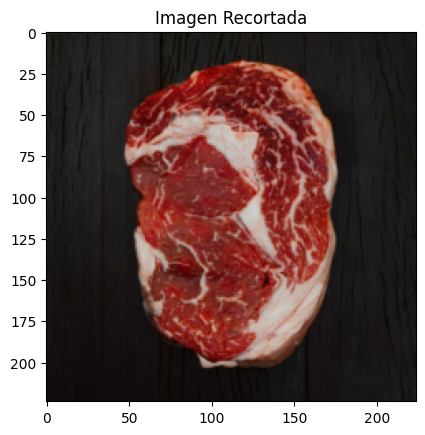

In [36]:

# Recortar la imagen
crop_transform = transforms.CenterCrop(224)
image_cropped = crop_transform(image_resized)
plt.figure()
plt.title("Imagen Recortada")
plt.imshow(image_cropped)
plt.show()


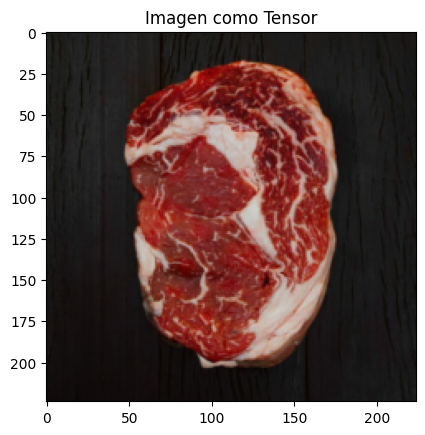

In [37]:

# Convertir la imagen a tensor
tensor_transform = transforms.ToTensor()
image_tensor = tensor_transform(image_cropped)
plt.figure()
plt.title("Imagen como Tensor")
plt.imshow(image_tensor.permute(1, 2, 0))
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0007002..1.733682].


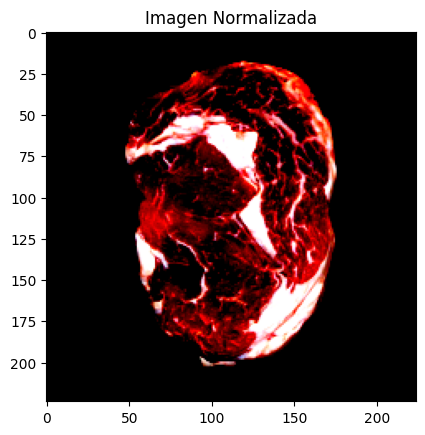

In [38]:

# Normalizar la imagen
normalize_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
image_normalized = normalize_transform(image_tensor)
plt.figure()
plt.title("Imagen Normalizada")
plt.imshow(image_normalized.permute(1, 2, 0))
plt.show()


In [39]:
# Aplicar las transformaciones a la imagen
input_tensor = preprocess(image)
print(input_tensor)

tensor([[[-1.5870, -1.5870, -1.5185,  ..., -1.6898, -1.7412, -1.7069],
         [-1.5699, -1.5699, -1.5528,  ..., -1.6555, -1.7240, -1.7069],
         [-1.5699, -1.5699, -1.5357,  ..., -1.6555, -1.7069, -1.7412],
         ...,
         [-1.8782, -1.8439, -1.8610,  ..., -1.6555, -1.6727, -1.6384],
         [-1.8782, -1.8610, -1.8610,  ..., -1.6727, -1.6555, -1.5870],
         [-1.8782, -1.8610, -1.8610,  ..., -1.7240, -1.6555, -1.5870]],

        [[-1.4230, -1.4405, -1.4055,  ..., -1.6155, -1.6506, -1.6506],
         [-1.3880, -1.4230, -1.4230,  ..., -1.5805, -1.6331, -1.6331],
         [-1.3880, -1.4055, -1.4055,  ..., -1.5805, -1.5980, -1.6681],
         ...,
         [-1.8606, -1.8256, -1.8431,  ..., -1.5630, -1.5805, -1.5455],
         [-1.8606, -1.8431, -1.8431,  ..., -1.5805, -1.5630, -1.4930],
         [-1.8606, -1.8431, -1.8431,  ..., -1.6331, -1.5805, -1.4930]],

        [[-1.2467, -1.2816, -1.2467,  ..., -1.4210, -1.4559, -1.4559],
         [-1.2293, -1.2641, -1.2816,  ..., -1

In [40]:
# Añadir una dimensión para el batch
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [41]:
output_predictions.unique()

tensor([11])

In [42]:
# Definir la paleta de colores para las tres clases
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(3)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")
print(colors)

[[  0   0   0]
 [  1 127  31]
 [  2 254  62]]


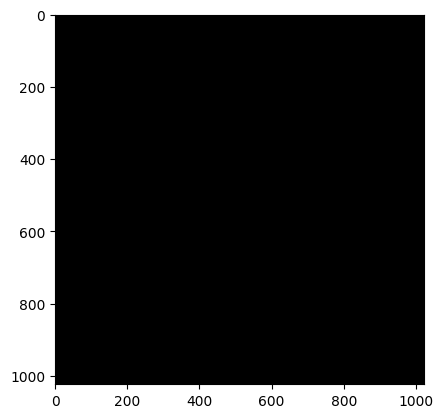

In [43]:
# Visualizar las predicciones de segmentación
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(image.size)
r.putpalette(colors)

plt.imshow(r)
plt.show()